<a href="https://colab.research.google.com/github/sarikasea/Machine-Learning/blob/main/Random_Forests_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Data

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00


In [2]:
!pip install xgboost

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [4]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exercise 1: How many observations and features does the dataset have?


In [5]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


### Initialize models
In this step you define the number of base estimators, or individual trees, to be used in each model, and then intialize models for Random Forest regression and XGBoost regression.  You'll just use the default parameters to make the performance comparisons. As a part of the performance comparison, we'll also measure the training times for both models.


In [6]:
# Initialize models
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [7]:
# Fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

### Exercise 2. Use the fitted models to make predictions on the test set.
Also, measure the time it takes for each model to make its predictions using the time.time() function to measure the times before and after each model prediction.


In [8]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

### Exercise 3:  Calulate the MSE and R^2 values for both models


In [9]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Exercise 4:  Print the MSE and R^2 values for both models


In [10]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


### Explanation of Metrics

*   **Mean Squared Error (MSE)**: MSE is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. In this case, XGBoost has a lower MSE (0.2226) compared to Random Forest (0.2554), suggesting that XGBoost's predictions are closer to the actual housing prices on average.

*   **R-squared (R²)**: R² represents the proportion of the variance in the dependent variable (housing prices) that is predictable from the independent variables (features). An R² value of 1 indicates that the model perfectly predicts the dependent variable, while an R² of 0 indicates that the model performs no better than simply predicting the mean of the dependent variable. Here, both models have high R² values (0.8051 for Random Forest and 0.8301 for XGBoost), meaning they explain a large portion of the variance in housing prices. XGBoost's slightly higher R² suggests it explains a bit more of the variance.

### Exercise 5:  Print the timings for each model


In [11]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 27.579 seconds, Testing time = 0.164 seconds
      XGBoost:  Training Time = 1.688 seconds, Testing time = 0.010 seconds


What is very impressive is the difference in computation time between XGBoost and Random Forest for both training and testing.

Next, you want to generate scatter plots between the predicted and actual values for both models so you can visually evaluate how well each model performs.
We'll also plot lines one standard deviation of the test data above and below the ideal line, that is, the line that represents the perfect regressor, where the predictions are all correct.

### Exercise 6. Calculate the standard deviation of the test data


In [15]:
# Standard deviation of y_test
std_y = np.std(y_test)

In [16]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
std_y = np.std(y_test)

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 27.579 seconds, Testing time = 0.171 seconds
      XGBoost:  Training Time = 1.688 seconds, Testing time = 0.009 seconds


Visualize the Results

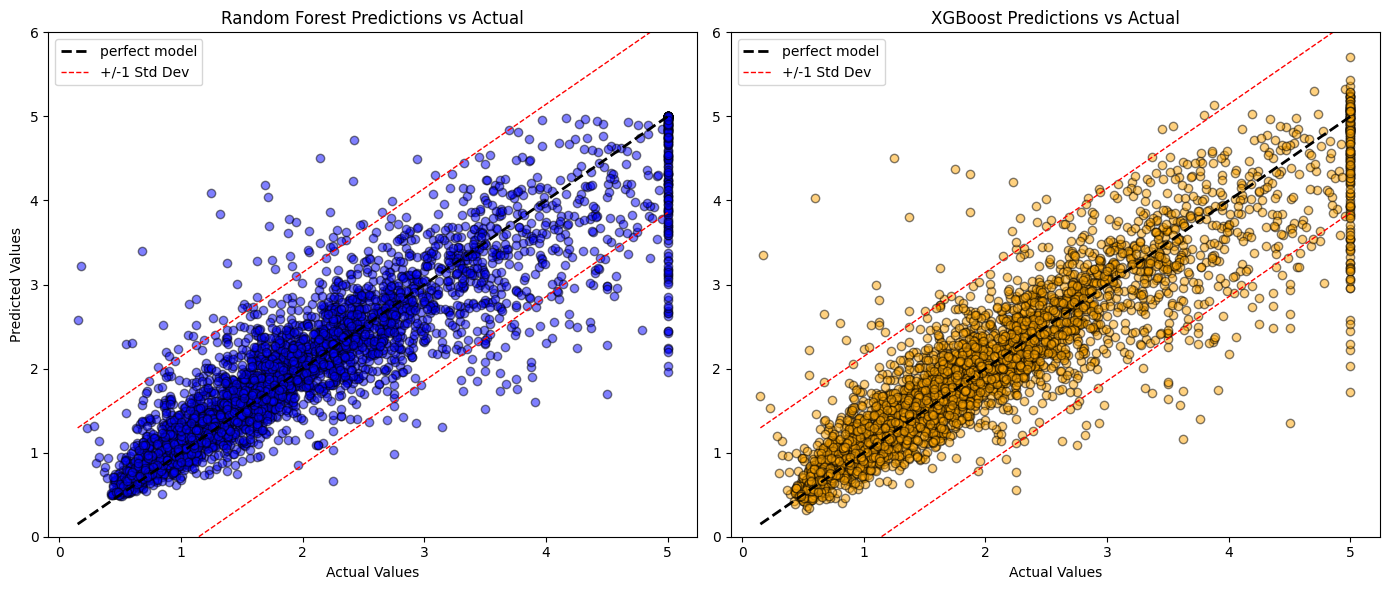

In [17]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Both models performed very well. Most of their predictions fall within a standard deviation of the target. Interestingly, random forest "respects" the upper bound (the maximum value) present in the target by staying within its limits, while XGBoost "overshoots", or exceeds this limit.